In [1]:
import google.generativeai as genai, json
from matplotlib import pyplot as plt
import time, pandas as pd
from utils import load_env_vars

load_env_vars()

base_models = [m.name for m in genai.list_models() if "createTunedModel" in m.supported_generation_methods]
base_models

['models/gemini-1.0-pro-001', 'models/gemini-1.5-flash-001-tuning']

lamp-gem-1p5-flash-r-c


  0%|          | 0/625 [00:00<?, ?it/s]

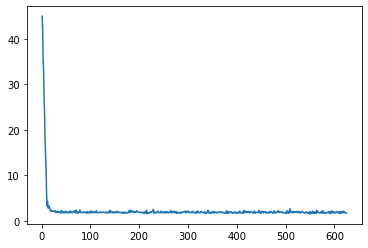

lamp-gem-1p5-flash-p-c


  0%|          | 0/529 [00:00<?, ?it/s]

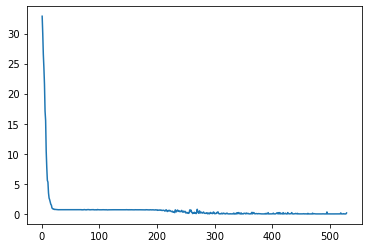

lamp-gem-1p5-flash-pr-c


  0%|          | 0/1154 [00:00<?, ?it/s]

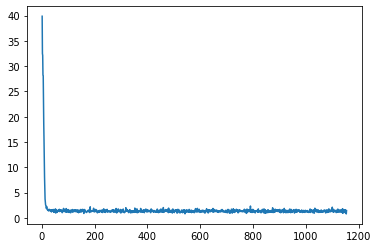

In [2]:
for base_model, short_model in [("models/gemini-1.5-flash-001-tuning", "1p5-flash")]: # , ("models/gemini-1.0-pro-001", "1p0-pro")
    for variant in ["a", "b", "c"]:
        for dataset_types in ["P"]: # , "S", "PS", "RS", "PRS"
            model_name = f"lamp-gem-{short_model}-{dataset_types.lower()}-{variant}"
            print(model_name)

            with open(f"data/lamp_{dataset_types}_train.json", "r") as f:
                training_data = json.load(f)

            operation = genai.create_tuned_model(source_model=base_model, training_data=training_data, id=model_name) # , epoch_count=4, batch_size=16, learning_rate=0.001
            for status in operation.wait_bar():
                time.sleep(30)

            model = operation.result()
            snapshots = pd.DataFrame(model.tuning_task.snapshots)

            plt.plot(snapshots['step'].tolist(), snapshots['mean_loss'].tolist())
            plt.show()